In [1]:
from pybaseball import statcast

In [2]:
#hitter_stats = statcast(start_dt='2016-04-01', end_dt='2019-10-04')

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import datasets

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [3]:
hitter_stats = pd.read_csv("C:/Users/wei/Documents/碩士/碩一/巨量資料應用專題/bat.csv")

In [5]:
#hitter_stats.to_csv('bat.csv',index=False)

In [6]:
hitter_stats

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,KC,2019-10-04,81.7,-2.51,6.19,"Melancon, Mark",543939,453343,strikeout,swinging_strike_blocked,...,3,0,3,0,3,Strategic,Standard,14.0,0.032,-0.390
1,KC,2019-10-04,82.0,-2.67,6.27,"Melancon, Mark",543939,453343,NaN,swinging_strike_blocked,...,3,0,3,0,3,Strategic,Standard,15.0,0.000,-0.103
2,KC,2019-10-04,80.8,-2.49,6.24,"Melancon, Mark",543939,453343,NaN,called_strike,...,3,0,3,0,3,Strategic,Standard,12.0,0.000,-0.064
3,KC,2019-10-04,81.2,-2.54,6.25,"Melancon, Mark",543939,453343,NaN,ball,...,3,0,3,0,3,Strategic,Standard,9.0,0.000,0.053
4,KC,2019-10-04,81.1,-2.67,6.23,"Melancon, Mark",543939,453343,NaN,blocked_ball,...,3,0,3,0,3,Strategic,Standard,15.0,0.000,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924547,KC,2016-04-03,84.0,-1.57,5.42,"Vólquez, Edinson",434158,450172,NaN,foul,...,0,0,0,0,0,Standard,Standard,56.0,0.000,0.000
2924548,SI,2016-04-03,96.6,-1.17,5.44,"Vólquez, Edinson",434158,450172,NaN,ball,...,0,0,0,0,0,Standard,Standard,254.0,0.000,0.040
2924549,SI,2016-04-03,96.9,-1.05,5.38,"Vólquez, Edinson",434158,450172,NaN,ball,...,0,0,0,0,0,Standard,Standard,247.0,0.000,0.018
2924550,KC,2016-04-03,82.5,-1.46,5.48,"Vólquez, Edinson",434158,450172,NaN,called_strike,...,0,0,0,0,0,Standard,Standard,50.0,0.000,-0.050


In [4]:
baseball_cols = ['game_date', 'home_team', 'away_team', 'player_name', 'pitcher', 'pitch_type', 'pitch_name', 'release_speed',
                 'batter', 'events', 'description', 'bb_type', 'des', 'launch_speed', 'launch_angle', 'hit_distance_sc','game_year'] 

hitter = hitter_stats[baseball_cols]

In [5]:
hitter

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
0,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.7,543939,strikeout,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
1,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,82.0,543939,NaN,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
2,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,80.8,543939,NaN,called_strike,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
3,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.2,543939,NaN,ball,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
4,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.1,543939,NaN,blocked_ball,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924547,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,KC,Knuckle Curve,84.0,434158,NaN,foul,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924548,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.6,434158,NaN,ball,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924549,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,434158,NaN,ball,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924550,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,KC,Knuckle Curve,82.5,434158,NaN,called_strike,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016


In [10]:
hitter.dropna(subset=['events'], inplace=True)
hitter

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
0,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.7,543939,strikeout,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
5,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,91.8,425877,strikeout,foul_tip,NaN,Yadier Molina strikes out on a foul tip.,NaN,NaN,NaN,2019
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,hit_into_play,line_drive,Marcell Ozuna singles on a line drive to right...,81.5,13.0,169.0,2019
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,hit_into_play,line_drive,Paul Goldschmidt singles on a line drive to ce...,89.7,18.0,221.0,2019
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,hit_into_play,ground_ball,"Tommy Edman grounds out, first baseman Freddie...",77.3,-21.0,7.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924533,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,97.9,519058,field_error,hit_into_play,line_drive,Mike Moustakas reaches on a fielding error by ...,105.7,14.0,310.0,2016
2924537,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,96.9,444876,field_out,hit_into_play,ground_ball,"Alcides Escobar grounds out softly, third base...",82.9,-21.0,NaN,2016
2924538,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,493316,field_out,hit_into_play,ground_ball,"Yoenis Cespedes grounds out softly, shortstop ...",62.6,-22.0,7.0,2016
2924541,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,CH,Changeup,87.4,431151,field_out,hit_into_play,ground_ball,"David Wright grounds out, third baseman Mike M...",81.5,2.0,47.0,2016


In [11]:
null_batted_ball_type = hitter.bb_type.isnull()
hitter[null_batted_ball_type]

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
0,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.7,543939,strikeout,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
5,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,91.8,425877,strikeout,foul_tip,NaN,Yadier Molina strikes out on a foul tip.,NaN,NaN,NaN,2019
22,2019-10-04,ATL,STL,"Webb, Tyler",643778,CU,Curveball,77.8,455976,strikeout,swinging_strike_blocked,NaN,Nick Markakis strikes out swinging.,NaN,NaN,NaN,2019
27,2019-10-04,ATL,STL,"Webb, Tyler",643778,FF,4-Seam Fastball,92.1,518626,strikeout,swinging_strike,NaN,Josh Donaldson strikes out swinging.,NaN,NaN,NaN,2019
45,2019-10-04,ATL,STL,"Fried, Max",608331,CU,Curveball,77.9,664056,strikeout,swinging_strike,NaN,Harrison Bader strikes out swinging.,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924493,2016-04-03,KC,NYM,"Harvey, Matt",518774,CH,Changeup,89.1,460086,strikeout,swinging_strike,NaN,Alex Gordon strikes out swinging.,NaN,NaN,NaN,2016
2924505,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,95.6,624424,walk,ball,NaN,Michael Conforto walks.,NaN,NaN,NaN,2016
2924510,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.4,435522,strikeout,called_strike,NaN,Neil Walker called out on strikes.,NaN,NaN,NaN,2016
2924516,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,KC,Knuckle Curve,82.6,446263,strikeout,called_strike,NaN,Lucas Duda called out on strikes.,NaN,NaN,NaN,2016


In [12]:
hitter[null_batted_ball_type].events.value_counts(dropna=False)

strikeout                       164599
walk                             59616
hit_by_pitch                      7408
intent_walk                        951
caught_stealing_2b                 804
strikeout_double_play              600
other_out                          155
catcher_interf                      64
caught_stealing_3b                  55
batter_interference                 53
pickoff_1b                          38
pickoff_2b                          32
caught_stealing_home                28
wild_pitch                          19
pickoff_caught_stealing_2b           7
pickoff_caught_stealing_home         7
stolen_base_2b                       5
passed_ball                          5
pickoff_3b                           4
pickoff_caught_stealing_3b           4
game_advisory                        3
runner_double_play                   2
ejection                             2
pickoff_error_2b                     1
stolen_base_3b                       1
stolen_base_home         

In [7]:
hitter_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924552 entries, 0 to 2924551
Data columns (total 92 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   pitch_type                       object 
 1   game_date                        object 
 2   release_speed                    float64
 3   release_pos_x                    float64
 4   release_pos_z                    float64
 5   player_name                      object 
 6   batter                           int64  
 7   pitcher                          int64  
 8   events                           object 
 9   description                      object 
 10  spin_dir                         float64
 11  spin_rate_deprecated             float64
 12  break_angle_deprecated           float64
 13  break_length_deprecated          float64
 14  zone                             float64
 15  des                              object 
 16  game_type                        object 
 17  stand   

In [8]:
baseball_cols = ['game_date', 'home_team', 'away_team', 'player_name', 'pitcher', 'pitch_type', 'pitch_name', 'release_speed',
                 'batter', 'events', 'description', 'bb_type', 'des', 'launch_speed', 'launch_angle', 'hit_distance_sc','game_year'] 

hitter = hitter_stats[baseball_cols]

In [9]:
hitter.head()

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
0,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.7,543939,strikeout,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
1,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,82.0,543939,NaN,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
2,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,80.8,543939,NaN,called_strike,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
3,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.2,543939,NaN,ball,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
4,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.1,543939,NaN,blocked_ball,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019


In [10]:
hitter.isnull().sum()

game_date                0
home_team                0
away_team                0
player_name              0
pitcher                  0
pitch_type           16185
pitch_name           16185
release_speed        23759
batter                   0
events             2176110
description              0
bb_type            2410574
des                      0
launch_speed       2125103
launch_angle       2125166
hit_distance_sc    2165366
game_year                0
dtype: int64

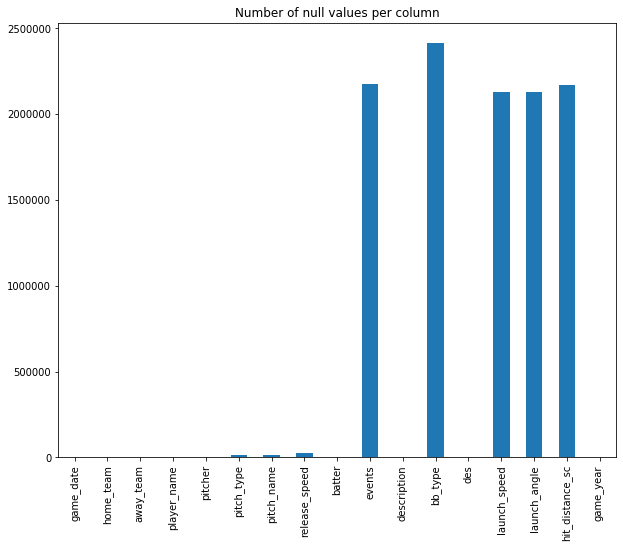

In [11]:
hitter.isnull().sum().plot.bar(figsize=(10, 8));
plt.title('Number of null values per column');

In [12]:
hitter.events.value_counts(dropna=False)

NaN                             2176110
field_out                        296899
strikeout                        164599
single                           107798
walk                              59616
double                            33769
home_run                          24342
force_out                         14880
grounded_into_double_play         14575
hit_by_pitch                       7408
field_error                        5377
sac_fly                            4743
sac_bunt                           3588
triple                             3328
double_play                        1745
fielders_choice                    1489
fielders_choice_out                1238
intent_walk                         951
caught_stealing_2b                  804
strikeout_double_play               600
batter_interference                 163
other_out                           155
sac_fly_double_play                  67
catcher_interf                       67
caught_stealing_3b                   55


In [13]:
null_events = hitter.events.isnull()
hitter[null_events]

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
1,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,82.0,543939,NaN,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
2,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,80.8,543939,NaN,called_strike,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
3,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.2,543939,NaN,ball,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
4,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.1,543939,NaN,blocked_ball,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
6,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.3,425877,NaN,foul,NaN,Yadier Molina strikes out on a foul tip.,63.6,-40.0,2.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924547,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,KC,Knuckle Curve,84.0,434158,NaN,foul,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924548,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.6,434158,NaN,ball,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924549,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,434158,NaN,ball,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016
2924550,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,KC,Knuckle Curve,82.5,434158,NaN,called_strike,NaN,Curtis Granderson lines out to center fielder ...,NaN,NaN,NaN,2016


In [14]:
hitter[null_events].description.value_counts(dropna=False)

ball                       927970
foul                       511877
called_strike              451125
swinging_strike            188997
blocked_ball                63696
foul_tip                    14698
foul_bunt                    7423
swinging_strike_blocked      5828
intent_ball                  2374
missed_bunt                  1528
pitchout                      427
bunt_foul_tip                 141
hit_into_play                  21
swinging_pitchout               4
foul_pitchout                   1
Name: description, dtype: int64

In [15]:
hitter.dropna(subset=['events'], inplace=True)
hitter

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
0,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.7,543939,strikeout,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
5,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,91.8,425877,strikeout,foul_tip,NaN,Yadier Molina strikes out on a foul tip.,NaN,NaN,NaN,2019
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,hit_into_play,line_drive,Marcell Ozuna singles on a line drive to right...,81.5,13.0,169.0,2019
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,hit_into_play,line_drive,Paul Goldschmidt singles on a line drive to ce...,89.7,18.0,221.0,2019
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,hit_into_play,ground_ball,"Tommy Edman grounds out, first baseman Freddie...",77.3,-21.0,7.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924533,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,97.9,519058,field_error,hit_into_play,line_drive,Mike Moustakas reaches on a fielding error by ...,105.7,14.0,310.0,2016
2924537,2016-04-03,KC,NYM,"Harvey, Matt",518774,FF,4-Seam Fastball,96.9,444876,field_out,hit_into_play,ground_ball,"Alcides Escobar grounds out softly, third base...",82.9,-21.0,NaN,2016
2924538,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.9,493316,field_out,hit_into_play,ground_ball,"Yoenis Cespedes grounds out softly, shortstop ...",62.6,-22.0,7.0,2016
2924541,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,CH,Changeup,87.4,431151,field_out,hit_into_play,ground_ball,"David Wright grounds out, third baseman Mike M...",81.5,2.0,47.0,2016


In [16]:
#bb type
hitter.bb_type.value_counts(dropna=False)

NaN            234464
ground_ball    231048
line_drive     129661
fly_ball       116223
popup           37046
Name: bb_type, dtype: int64

In [17]:
null_batted_ball_type = hitter.bb_type.isnull()
hitter[null_batted_ball_type]

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
0,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.7,543939,strikeout,swinging_strike_blocked,NaN,Kolten Wong strikes out swinging.,NaN,NaN,NaN,2019
5,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,91.8,425877,strikeout,foul_tip,NaN,Yadier Molina strikes out on a foul tip.,NaN,NaN,NaN,2019
22,2019-10-04,ATL,STL,"Webb, Tyler",643778,CU,Curveball,77.8,455976,strikeout,swinging_strike_blocked,NaN,Nick Markakis strikes out swinging.,NaN,NaN,NaN,2019
27,2019-10-04,ATL,STL,"Webb, Tyler",643778,FF,4-Seam Fastball,92.1,518626,strikeout,swinging_strike,NaN,Josh Donaldson strikes out swinging.,NaN,NaN,NaN,2019
45,2019-10-04,ATL,STL,"Fried, Max",608331,CU,Curveball,77.9,664056,strikeout,swinging_strike,NaN,Harrison Bader strikes out swinging.,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924493,2016-04-03,KC,NYM,"Harvey, Matt",518774,CH,Changeup,89.1,460086,strikeout,swinging_strike,NaN,Alex Gordon strikes out swinging.,NaN,NaN,NaN,2016
2924505,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,95.6,624424,walk,ball,NaN,Michael Conforto walks.,NaN,NaN,NaN,2016
2924510,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,SI,Sinker,96.4,435522,strikeout,called_strike,NaN,Neil Walker called out on strikes.,NaN,NaN,NaN,2016
2924516,2016-04-03,KC,NYM,"Vólquez, Edinson",450172,KC,Knuckle Curve,82.6,446263,strikeout,called_strike,NaN,Lucas Duda called out on strikes.,NaN,NaN,NaN,2016


In [18]:
hitter[null_batted_ball_type].events.value_counts(dropna=False)

strikeout                       164599
walk                             59616
hit_by_pitch                      7408
intent_walk                        951
caught_stealing_2b                 804
strikeout_double_play              600
other_out                          155
catcher_interf                      64
caught_stealing_3b                  55
batter_interference                 53
pickoff_1b                          38
pickoff_2b                          32
caught_stealing_home                28
wild_pitch                          19
pickoff_caught_stealing_2b           7
pickoff_caught_stealing_home         7
stolen_base_2b                       5
passed_ball                          5
pickoff_caught_stealing_3b           4
pickoff_3b                           4
game_advisory                        3
runner_double_play                   2
ejection                             2
pickoff_error_2b                     1
stolen_base_home                     1
stolen_base_3b           

In [19]:
hitter.dropna(subset=['bb_type'], inplace=True)

In [20]:
hitter.events.value_counts(dropna=False)

field_out                    296899
single                       107798
double                        33769
home_run                      24342
force_out                     14880
grounded_into_double_play     14575
field_error                    5377
sac_fly                        4743
sac_bunt                       3588
triple                         3328
double_play                    1745
fielders_choice                1489
fielders_choice_out            1238
batter_interference             110
sac_fly_double_play              67
triple_play                      19
sac_bunt_double_play              5
game_advisory                     3
catcher_interf                    3
Name: events, dtype: int64

In [21]:
hitter.bb_type.value_counts(dropna=False)

ground_ball    231048
line_drive     129661
fly_ball       116223
popup           37046
Name: bb_type, dtype: int64

In [22]:
pd.crosstab(hitter.events, hitter.bb_type, margins=True, margins_name='Total', dropna=False)

bb_type,fly_ball,ground_ball,line_drive,popup,Total
events,,,,,
batter_interference,0,101,0,9,110
catcher_interf,0,2,1,0,3
double,5157,4531,23896,185,33769
double_play,306,161,1204,74,1745
field_error,251,4742,234,150,5377
field_out,81648,134447,44900,35904,296899
fielders_choice,1,1487,1,0,1489
fielders_choice_out,0,1235,2,1,1238
force_out,61,14651,97,71,14880


In [23]:
hitter.isnull().sum()

game_date              0
home_team              0
away_team              0
player_name            0
pitcher                0
pitch_type          2822
pitch_name          2822
release_speed       4398
batter                 0
events                 0
description            0
bb_type                0
des                    0
launch_speed       10118
launch_angle       10181
hit_distance_sc    53273
game_year              0
dtype: int64

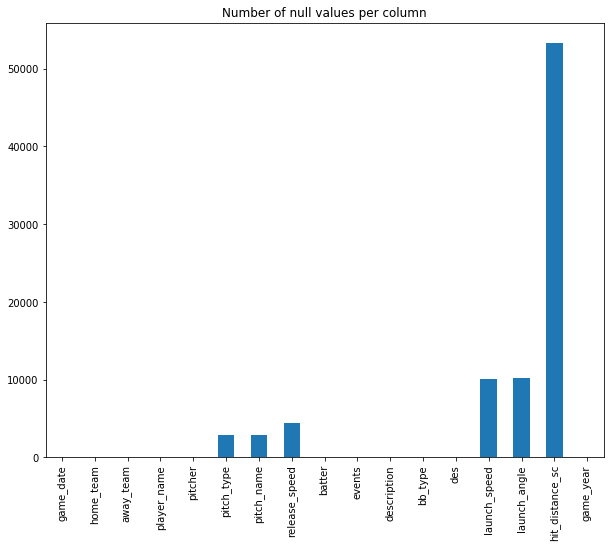

In [24]:
hitter.isnull().sum().plot.bar(figsize=(10, 8));
plt.title('Number of null values per column');

In [25]:
hitter.dropna(subset=['pitch_name', 'release_speed', 'launch_angle','launch_speed'], inplace=True)

In [26]:
hitter.isnull().sum()

game_date              0
home_team              0
away_team              0
player_name            0
pitcher                0
pitch_type             0
pitch_name             0
release_speed          0
batter                 0
events                 0
description            0
bb_type                0
des                    0
launch_speed           0
launch_angle           0
hit_distance_sc    43041
game_year              0
dtype: int64

In [27]:
hitter.drop(['pitcher', 'batter','game_year'], axis=1).describe()

,release_speed,launch_speed,launch_angle,hit_distance_sc
count,503473.000000,503473.000000,503473.000000,460432.000000
mean,88.867697,88.039741,11.997432,171.316207
std,5.800698,13.738623,27.132614,137.494070
min,45.100000,5.200000,-89.000000,0.000000
25%,84.900000,80.000000,-7.000000,22.000000
50%,90.200000,89.900000,12.000000,171.000000
75%,93.300000,98.500000,30.000000,296.000000
max,105.400000,122.200000,90.000000,505.000000


In [28]:
hitter.hit_distance_sc.value_counts(dropna=False)

NaN      43041
4.0      11667
3.0      11323
5.0      10465
6.0       9155
         ...  
504.0        1
490.0        1
485.0        1
493.0        1
483.0        1
Name: hit_distance_sc, Length: 497, dtype: int64

In [29]:
hitter.head()

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,description,bb_type,des,launch_speed,launch_angle,hit_distance_sc,game_year
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,hit_into_play,line_drive,Marcell Ozuna singles on a line drive to right...,81.5,13.0,169.0,2019
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,hit_into_play,line_drive,Paul Goldschmidt singles on a line drive to ce...,89.7,18.0,221.0,2019
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,hit_into_play,ground_ball,"Tommy Edman grounds out, first baseman Freddie...",77.3,-21.0,7.0,2019
34,2019-10-04,ATL,STL,"Webb, Tyler",643778,FT,2-Seam Fastball,92.0,518692,field_out,hit_into_play,ground_ball,"Freddie Freeman grounds out, first baseman Pau...",84.5,-11.0,13.0,2019
40,2019-10-04,ATL,STL,"Fried, Max",608331,FF,4-Seam Fastball,96.3,451594,field_out,hit_into_play,line_drive,Dexter Fowler lines out sharply to center fiel...,106.4,15.0,351.0,2019


In [30]:
pd.crosstab(hitter.pitch_name, hitter.game_year, margins=True, margins_name='Total')

game_year,2016,2017,2018,2019,Total
pitch_name,,,,,
2-Seam Fastball,16919,19646,16589,12620,65774
4-Seam Fastball,43544,41643,41628,41288,168103
Changeup,14228,14038,14784,15791,58841
Curveball,9262,8502,8340,9392,35496
Cutter,6763,7216,7597,8634,30210
Eephus,22,33,40,12,107
Forkball,43,46,8,7,104
Knuckle Curve,2264,3189,2887,2318,10658
Knuckleball,745,539,141,29,1454


In [60]:
hitter['pitch_name_low_freq'] = np.where(hitter.pitch_name.isin(['Eephus', 'Fastball', 'Forkball', 'Pitch Out', 'Screwball', 'Unknown']), 1, 0)

In [61]:
hitter.pitch_name_low_freq.value_counts(dropna=False)

0    460209
1       223
Name: pitch_name_low_freq, dtype: int64

In [63]:
hitter_new = hitter[hitter.pitch_name_low_freq == 0]
hitter_new.drop('pitch_name_low_freq', axis=1, inplace=True)

In [64]:
pd.crosstab(hitter_new.pitch_type, hitter_new.game_year, margins=True, margins_name='Total')

game_year,2016,2017,2018,2019,Total
pitch_type,,,,,
CH,12672,12595,13507,14481,53255
CU,8330,7735,7772,8746,32583
FC,6148,6547,7074,8008,27777
FF,39701,38214,38574,38256,154745
FS,1685,1841,1661,1615,6802
FT,15239,17828,15450,11761,60278
KC,2036,2859,2693,2183,9771
KN,672,473,131,27,1303
SI,11720,10198,11607,10668,44193


In [31]:
baseball_correlations = hitter.drop(['pitcher', 'batter','game_year'], axis=1).corr(method='pearson')
baseball_correlations

,release_speed,launch_speed,launch_angle,hit_distance_sc
release_speed,1.000000,0.089973,0.008992,0.018490
launch_speed,0.089973,1.000000,0.121091,0.361628
launch_angle,0.008992,0.121091,1.000000,0.722911
hit_distance_sc,0.018490,0.361628,0.722911,1.000000


In [32]:
import seaborn as sns

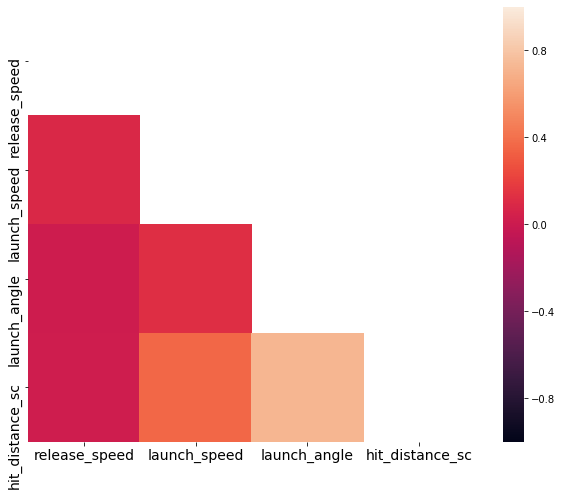

In [33]:
fig, ax = plt.subplots(figsize=(10, 8));

mask = np.zeros_like(baseball_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(baseball_correlations, vmin=-1, vmax=1, mask=mask, ax=ax);

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

plt.show();

In [34]:
hitter.groupby(by='pitch_name').release_speed.describe()

,count,mean,std,min,25%,50%,75%,max
pitch_name,,,,,,,,
2-Seam Fastball,65774.0,92.625136,2.626742,76.0,91.000,92.7,94.400,101.9
4-Seam Fastball,168103.0,93.188624,2.793143,57.7,91.500,93.2,95.000,105.4
Changeup,58841.0,84.176693,3.467178,51.5,82.200,84.5,86.500,96.2
Curveball,35496.0,78.195842,3.806950,45.1,75.800,78.4,80.900,90.3
Cutter,30210.0,88.506584,2.905755,56.3,86.600,88.4,90.400,101.4
Eephus,107.0,66.546729,2.446612,59.5,65.350,66.7,68.150,72.2
Forkball,104.0,86.180769,2.723151,79.7,85.175,86.8,87.925,91.4
Knuckle Curve,10658.0,80.599005,3.072829,56.9,78.700,80.6,82.500,90.5
Knuckleball,1454.0,76.265475,2.909482,57.9,74.400,76.5,78.500,83.1


In [35]:
hitter.isnull().sum()

game_date              0
home_team              0
away_team              0
player_name            0
pitcher                0
pitch_type             0
pitch_name             0
release_speed          0
batter                 0
events                 0
description            0
bb_type                0
des                    0
launch_speed           0
launch_angle           0
hit_distance_sc    43041
game_year              0
dtype: int64

In [36]:
hitter.dropna(subset=['hit_distance_sc'], inplace=True)

In [37]:
hitter_new = hitter.join(pd.get_dummies(hitter.pitch_name, prefix='pitch_name', drop_first=True))
hitter_new.head()

,game_date,home_team,away_team,player_name,pitcher,pitch_type,pitch_name,release_speed,batter,events,...,pitch_name_Cutter,pitch_name_Eephus,pitch_name_Forkball,pitch_name_Knuckle Curve,pitch_name_Knuckleball,pitch_name_Pitch Out,pitch_name_Screwball,pitch_name_Sinker,pitch_name_Slider,pitch_name_Split-Finger
11,2019-10-04,ATL,STL,"Melancon, Mark",453343,KC,Knuckle Curve,81.8,542303,single,...,0,0,0,1,0,0,0,0,0,0
15,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.5,502671,single,...,1,0,0,0,0,0,0,0,0,0
17,2019-10-04,ATL,STL,"Melancon, Mark",453343,FC,Cutter,92.0,669242,field_out,...,1,0,0,0,0,0,0,0,0,0
34,2019-10-04,ATL,STL,"Webb, Tyler",643778,FT,2-Seam Fastball,92.0,518692,field_out,...,0,0,0,0,0,0,0,0,0,0
40,2019-10-04,ATL,STL,"Fried, Max",608331,FF,4-Seam Fastball,96.3,451594,field_out,...,0,0,0,0,0,0,0,0,0,0


In [38]:
feature_cols = ['pitch_name_4-Seam Fastball', 'pitch_name_Changeup', 'pitch_name_Curveball', 'pitch_name_Cutter',
                'pitch_name_Knuckleball', 'pitch_name_Knuckle Curve', 'pitch_name_Sinker', 'pitch_name_Slider', 'pitch_name_Split-Finger',
                'release_speed', 'launch_speed', 'launch_angle']

In [39]:
X = hitter_new[feature_cols]
y = hitter_new.hit_distance_sc

In [40]:
from sklearn.linear_model import LinearRegression

C:\Users\wei\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\wei\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65)

In [43]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_test

1529048      2.0
2438854    455.0
127757       5.0
257080     284.0
1458845    294.0
           ...  
2189775    329.0
111862     240.0
533794      91.0
2320208    284.0
463704       2.0
Name: hit_distance_sc, Length: 138130, dtype: float64

In [45]:
r_sq = linreg.score(X_train, y_train)
r_sq

0.5845150747133829

In [46]:
print('Intercept:', round(linreg.intercept_, 4))
print('Coefficient(s):', list(zip(feature_cols, np.round(linreg.coef_, 4))))

Intercept: -46.8914
Coefficient(s): [('pitch_name_4-Seam Fastball', 7.0499), ('pitch_name_Changeup', 1.1349), ('pitch_name_Curveball', -1.6278), ('pitch_name_Cutter', 1.4553), ('pitch_name_Knuckleball', -6.9815), ('pitch_name_Knuckle Curve', -4.2548), ('pitch_name_Sinker', -1.352), ('pitch_name_Slider', 2.4291), ('pitch_name_Split-Finger', -1.6021), ('release_speed', -0.4687), ('launch_speed', 2.4237), ('launch_angle', 3.7115)]


In [47]:
name = X.columns
coef = np.round(linreg.coef_, 4)
pd.DataFrame([name, coef], index=['Name', 'Coefficient']).transpose()

,Name,Coefficient
0,pitch_name_4-Seam Fastball,7.0499
1,pitch_name_Changeup,1.1349
2,pitch_name_Curveball,-1.6278
3,pitch_name_Cutter,1.4553
4,pitch_name_Knuckleball,-6.9815
5,pitch_name_Knuckle Curve,-4.2548
6,pitch_name_Sinker,-1.352
7,pitch_name_Slider,2.4291
8,pitch_name_Split-Finger,-1.6021
9,release_speed,-0.4687


In [48]:
print('R^2:', round(linreg.score(X_test, y_test), 3))

R^2: 0.583


In [49]:
y_pred = linreg.predict(X_test)

In [50]:
y_pred

array([ -71.18859543,  265.71188385,  -17.90134726, ...,  159.26737761,
        212.67529006, -113.46800307])

In [54]:
print('Training MSE:', round(metrics.mean_squared_error(y_train, linreg.predict(X_train)), 3))

print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, linreg.predict(X_train))), 3))
print('')

print('Testing MSE:', round(metrics.mean_squared_error(y_test, y_pred), 3))

print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))

Training MSE: 7858.353
Training RMSE: 88.647

Testing MSE: 7873.609
Testing RMSE: 88.733
